# Before jumping to the code implementation
***
- Git을 사용하지 않고 해당 ipynb파일만 다운받고 싶으면 wget이나 curl을 사용하여도 좋습니다. 
    - wget https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture11-Unsupervised_Factor_Analysis.ipynb
    - curl https://raw.githubusercontent.com/COMBINE-SKKU/bio_data_mining/master/Lecture11-Unsupervised_Factor_Analysis.ipynb --output Lecture11-Unsupervised_Factor_Analysis.ipynb
<br><br><br>    
- 동영상과 같이 git clone을 사용하고 싶은 학생이 주의하여야 할 점은 git은 원칙적으로 이미 존재하는 디렉토리에는 clone을 하지 않으므로 디렉토리 (예를 들자면 /Documents/BioDataMining)를 지워주고 실행하여야 합니다. 
- Open the terminal and make a directory dedicated for this class code implementation (e.g., mkdir ~/Documents/BioDataMining)
- Install Git (https://git-scm.com/book/en/v2/Getting-Started-Installing-Git)
- Go to the directory for this class, and type: git clone https://github.com/COMBINE-SKKU/bio_data_mining.git
- If you are a newbie for programming a python and jupyter notebook, please install anaconda 
    - Window: https://problemsolvingwithpython.com/01-Orientation/01.03-Installing-Anaconda-on-Windows/
    - Mac: https://problemsolvingwithpython.com/01-Orientation/01.04-Installing-Anaconda-on-MacOS/
    - Linux: https://problemsolvingwithpython.com/01-Orientation/01.05-Installing-Anaconda-on-Linux/
- And learn how to open a jupyter notebook (https://www.youtube.com/watch?v=OJMILWh6ARY)
- Run the following codes.

# Factor Analysis
---
- Factor Analysis (FA): It is an unsupervised technique to extract maximum common variance from all variables and puts them into a common score. It helps in data interpretations by reducing the number of variables.
<br><br>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week11/Fig11-1.png' width="1000"/>

<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week11/Fig11-2.png' width="400"/>
<br>

- Observed variables are modeled as a linear combination of unobserved variable called 'factors' and 'error' terms.
- Each factor explains a particular amount of variance in the observed variables.
- Either an exploratory or confirmatory data analysis method

# Types of Factor Analysis
---
- Exploratory Factor Analysis (EFA): It is a technique used when the researcher does not have any hypothesis for underlying structures of a given data. Therefore it extracts the factors in a purely data driven way. It is the most popular approach among social science researchers. Its basic assumption is that any observed variable is directly associated with any factor.
- Confirmatory Factor Analysis (CFA): It aims to confirm validity of (researcher's hypothetical) factors underlying the observed variables. Its basic assumption is that each factor is associated with a particular set of observed variables.

# How does factor analysis work?
---
- Factor extraction: In this step, the number of factors and approach for extraction are selected using variance partitioning methods such as principal components analysis and common factor analysis (e.g., EM algorithm).
- Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.

# What is the factor rotation?
---
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week11/Fig11-5.png' width="1000"/>

- Unrotated results from a factor analysis – as presented above - is not easy to interpret, although the plot helps.
- Simply, we use the term “rotation” because the axes are being rotated so that the clusters of items fall as closely as possible to them.
- One of the main reasons for this rotation is to help the interpretation of factor loadings.
<br><br>
<img src='https://raw.githubusercontent.com/COMBINE-SKKU/combine-skku/master/class/week11/Fig11-8.png' width="1000"/>

# Different types of rotations
---
- Rotation methods fall into two broad categories: <b>orthogonal</b> and <b>oblique</b> (referring to the angle maintained between the X and Y axes). 
- Orthogonal rotations produce factors that are uncorrelated (<i>i.e.,</i> maintain a 90° angle between axes). 
- Oblique methods allow the factors to correlate (<i>i.e.,</i> allow the X and Y axes to assume a different angle than 90°).
- Traditionally, researchers have been guided to orthogonal rotation because uncorrelated factors are more easily interpretable.
- See https://scholarworks.umass.edu/cgi/viewcontent.cgi?article=1251&context=pare for more details.

# Factor Analysis Vs. Principle Component Analysis
---
- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.
- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.
- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.

# Factor Analysis in python using factor_analyzer package
---

In [1]:
# Import required libraries
# conda install -c ets factor_analyzer  # colab 사용하시는 분들은 !pip install factor_analyzer 를 입력해 주세요.
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Loading Data
---
- Let's perform factor analysis on BFI (dataset based on personality assessment project), which were collected using a 6 point response scale: <b>1 Very Inaccurate, 2 Moderately Inaccurate, 3 Slightly Inaccurate 4 Slightly Accurate, 5 Moderately Accurate, and 6 Very Accurate</b>. 
- You can also download this dataset from the following the link: https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [2]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv", index_col=0)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [3]:
# Dropping unnecessary columns
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

# Dropping missing values rows
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


In [10]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


# Adequacy Test
---
- Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
    - Bartlett’s Test
    - Kaiser-Meyer-Olkin Test

- Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

# In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

(18170.966350869243, 0.0)

- Kaiser-Meyer-Olkin (KMO) Test: It measures the suitability of data for factor analysis. KMO estimates the proportion of variance among all the observed variable. High proportion is more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [15]:
kmo_model

# The overall KMO for our data is 0.84, which is excellent. This value indicates that you can proceed with your planned factor analysis.

0.848539722194922

# Factor Analysis
---
- Choosing the number of factors

In [26]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

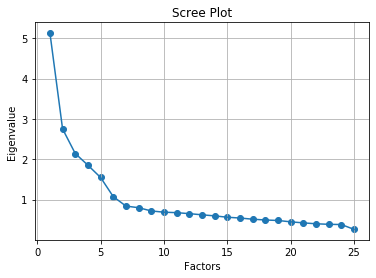

In [27]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [38]:
fa = FactorAnalyzer(6, rotation="Varimax")
fa.fit(df)

pd.DataFrame(data=fa.loadings_,  index=df.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5", "Factor6"])

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.095220,0.040783,0.048734,-0.530987,-0.113057,0.161216
A2,0.033131,0.235538,0.133714,0.661141,0.063734,-0.006244
A3,-0.009621,0.343008,0.121353,0.605933,0.033990,0.160106
A4,-0.081518,0.219717,0.235140,0.404594,-0.125338,0.086356
A5,-0.149616,0.414458,0.106382,0.469698,0.030977,0.236519
C1,-0.004358,0.077248,0.554582,0.007511,0.190124,0.095035
C2,0.068330,0.038370,0.674545,0.057055,0.087593,0.152775
C3,-0.039994,0.031867,0.551164,0.101282,-0.011338,0.008996
C4,0.216283,-0.066241,-0.638475,-0.102617,-0.143846,0.318359
C5,0.284187,-0.180812,-0.544838,-0.059955,0.025837,0.132423


- Factor 1 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 2 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
- Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 4 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 5 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
- Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

In [42]:
fa = FactorAnalyzer(5, rotation="Varimax")
fa.fit(df)

pd.DataFrame(data=fa.loadings_,  index=df.columns, columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"])

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.111126,0.040465,0.022798,-0.428166,-0.077931
A2,0.029588,0.213716,0.139037,0.626946,0.062139
A3,0.009357,0.317848,0.109331,0.650743,0.056196
A4,-0.066476,0.204566,0.230584,0.435624,-0.112700
A5,-0.122113,0.393034,0.087869,0.537087,0.066708
C1,0.010416,0.070184,0.545824,0.038878,0.209584
C2,0.089574,0.033270,0.648731,0.102782,0.115434
C3,-0.030855,0.023907,0.557036,0.111578,-0.005183
C4,0.240410,-0.064984,-0.633806,-0.037498,-0.107535
C5,0.290318,-0.176395,-0.562467,-0.047525,0.036822


In [43]:
# Get variance of each factors
pd.DataFrame(data=fa.get_factor_variance(),  index=["SS Loadings", "Proportion Var", "Cumulative Var"], columns=["Factor1", "Factor2", "Factor3", "Factor4", "Factor5"])

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.709633,2.473090,2.041106,1.844498,1.522153
Proportion Var,0.108385,0.098924,0.081644,0.073780,0.060886
Cumulative Var,0.108385,0.207309,0.288953,0.362733,0.423619
